## **_Cat or not cat_**

**1. Importamos las librerías necesarias**

In [1]:
# generales:
import os
import cv2
import h5py
import numpy as np
import pandas as pd
import tensorflow as tf

# para las redes neuronales:
from keras import models, layers
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model

# para plotting:
from matplotlib import cm
from matplotlib import pyplot as plt
%matplotlib inline

f"tensorflow version: {tf.__version__}"

'tensorflow version: 2.10.0'

**2. Cargar el dataset de imágenes de gatos y no gatos**

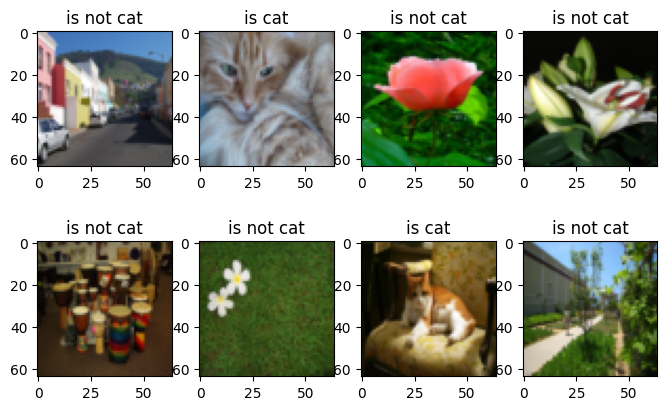

'(209, 64, 64, 3), (209,)'

In [2]:
train_dataset = h5py.File('./train_catvnoncat.h5', "r")
test_dataset = h5py.File('./test_catvnoncat.h5', "r")

originalTrainX = np.array(train_dataset["train_set_x"][:]) # train set features
originalTrainy = np.array(train_dataset["train_set_y"][:]) # train set labels
originalTestX  = np.array(test_dataset["test_set_x"][:])   # test set features
originalTesty  = np.array(test_dataset["test_set_y"][:])   # test set labels

fig = plt.figure(figsize=(8, 5))

ax1 = plt.subplot(241)
ax2 = plt.subplot(242)
ax3 = plt.subplot(243)
ax4 = plt.subplot(244)
ax5 = plt.subplot(245)
ax6 = plt.subplot(246)
ax7 = plt.subplot(247)
ax8 = plt.subplot(248)

ax1.set_title("is cat" if originalTrainy[1] else "is not cat")
ax2.set_title("is cat" if originalTrainy[2] else "is not cat")
ax3.set_title("is cat" if originalTrainy[3] else "is not cat")
ax4.set_title("is cat" if originalTrainy[4] else "is not cat")
ax5.set_title("is cat" if originalTrainy[5] else "is not cat")
ax6.set_title("is cat" if originalTrainy[6] else "is not cat")
ax7.set_title("is cat" if originalTrainy[7] else "is not cat")
ax8.set_title("is cat" if originalTrainy[8] else "is not cat")

ax1.imshow(originalTrainX[1, :, :, :])
ax2.imshow(originalTrainX[2, :, :, :])
ax3.imshow(originalTrainX[3, :, :, :])
ax4.imshow(originalTrainX[4, :, :, :])
ax5.imshow(originalTrainX[5, :, :, :])
ax6.imshow(originalTrainX[6, :, :, :])
ax7.imshow(originalTrainX[7, :, :, :])
ax8.imshow(originalTrainX[8, :, :, :])
plt.show()

f"{originalTrainX.shape}, {originalTrainy.shape}"

**3. Cargar el dataset de imágenes propias**

In [3]:
def getPadWidth(im, new_shape, is_rgb=True):
    pad_diff = new_shape - im.shape[0], new_shape - im.shape[1]
    t, b = math.floor(pad_diff[0]/2), math.ceil(pad_diff[0]/2)
    l, r = math.floor(pad_diff[1]/2), math.ceil(pad_diff[1]/2)
    if is_rgb:
        pad_width = ((t,b), (l,r), (0, 0))
    else:
        pad_width = ((t,b), (l,r))
    return pad_width

def padAndResize(img, pad=False, desired_size=64):
    if pad:
        pad_width = get_pad_width(img, max(img.shape))
        padded = np.pad(img, pad_width=pad_width, mode='constant', constant_values=0)
    else:
        padded = img
    resized = cv2.resize(padded, (desired_size,)*2).astype('uint8')
    return resized

def getTestImage(path):
    image = cv2.imread(path) # , cv2.IMREAD_COLOR
    img = np.asarray(image)
    img = padAndResize(img)
    # img = cv2.GaussianBlur(img, (3, 3), 0)
    return img

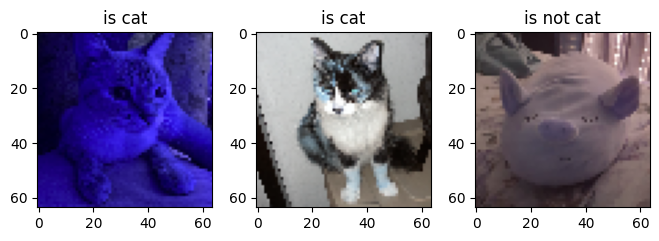

'(1, 12288), (1, 12288), (1, 12288)'

In [4]:
test1 = getTestImage("./test/1.png")
test2 = getTestImage("./test/2.png")
test3 = getTestImage("./test/3.png")

tmp1 = np.expand_dims(test1, axis=0)
tmp1 = tmp1.reshape(tmp1.shape[0], -1)
tmp2 = np.expand_dims(test2, axis=0)
tmp2 = tmp2.reshape(tmp2.shape[0], -1)
tmp3 = np.expand_dims(test3, axis=0)
tmp3 = tmp3.reshape(tmp3.shape[0], -1)

fig = plt.figure(figsize=(8, 5))

ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)

ax1.set_title("is cat")
ax2.set_title("is cat")
ax3.set_title("is not cat")

ax1.imshow(test1)
ax2.imshow(test2)
ax3.imshow(test3)
plt.show()

f"{tmp1.shape}, {tmp2.shape}, {tmp3.shape}"

**4. Aplanar los datos**

In [5]:
X = originalTrainX.reshape(originalTrainX.shape[0], -1)
y = np.expand_dims(originalTrainy, axis=1)

f"{X.shape}, {y.shape}"

'(209, 12288), (209, 1)'

**5. Calculamos las dimensiones requeridas para el perceptrón**

In [6]:
def getNetParams(x, t):
  if x.shape[0] != t.shape[0]:
    return 0, 0, 0
  features   = x.shape[1]
  categories = t.shape[1]
  samples    = x.shape[0]
  return features, categories, samples

In [7]:
features, categories, samples = getNetParams(X, y)
features, categories, samples

(12288, 1, 209)

## **Modelo del perceptrón**

In [14]:
def Perceptron():
    # crear el modelo de perceptrón
    model = models.Sequential(name="cat-or-not-cat")
    model.add(
      layers.Dense(
        name="perceptron",
        units=categories,
        activation="sigmoid",
        input_dim=features
      )
    )
    # compilar el modelo
    model.compile(
      loss="binary_crossentropy", # función de pérdida
      metrics=["accuracy"]
    ) # métricas con las que se evaluará el modelo
    return model

**6. Instanciamos y entrenamos nuestro modelo**

In [15]:
perceptron = Perceptron()
perceptron.summary()

Metal device set to: Apple M1
Model: "cat-or-not-cat"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 perceptron (Dense)          (None, 1)                 12289     
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


2022-12-06 22:22:58.600920: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-06 22:22:58.601638: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
metrics = perceptron.fit(X, y, epochs=1000, verbose=0)

2022-12-06 22:23:02.794599: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-06 22:23:03.016691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


### **Interpretando resultados**

**7. Observamos la función de pérdida de nuestro modelo durante el entrenamiento**

'min val: 0.0, last val: 0.0'

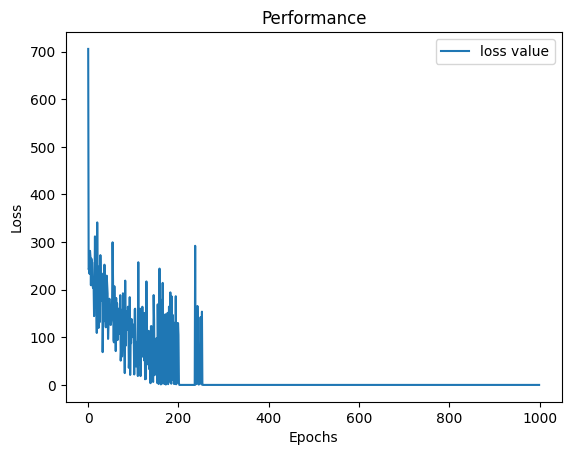

In [17]:
loss = metrics.history['loss']

ax = pd.DataFrame({'loss value': loss}).plot(title='Performance')
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.plot()

f"min val: {min(loss)}, last val: {loss[-1]}"

### **Clasificando imágenes**

**8. aplanamos los datos de prueba y los clasificamos**

2/2 [==============================] - 0s 5ms/step


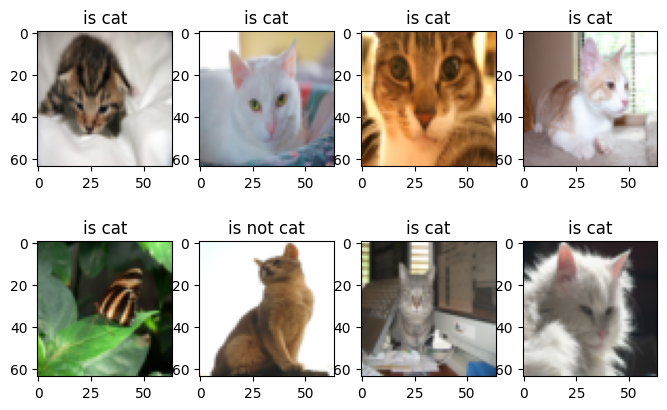

'test accuracy: 69.98446416854858 %'

In [22]:
XTest = originalTestX.reshape(originalTestX.shape[0], -1)
yTest = np.expand_dims(originalTesty, axis=1)
yPred = perceptron.predict(XTest)

fig = plt.figure(figsize=(8, 5))

ax1 = plt.subplot(241)
ax2 = plt.subplot(242)
ax3 = plt.subplot(243)
ax4 = plt.subplot(244)
ax5 = plt.subplot(245)
ax6 = plt.subplot(246)
ax7 = plt.subplot(247)
ax8 = plt.subplot(248)

ax1.set_title("is cat" if yPred[1] else "is not cat")
ax2.set_title("is cat" if yPred[2] else "is not cat")
ax3.set_title("is cat" if yPred[3] else "is not cat")
ax4.set_title("is cat" if yPred[4] else "is not cat")
ax5.set_title("is cat" if yPred[5] else "is not cat")
ax6.set_title("is cat" if yPred[6] else "is not cat")
ax7.set_title("is cat" if yPred[7] else "is not cat")
ax8.set_title("is cat" if yPred[8] else "is not cat")

ax1.imshow(originalTestX[1, :, :, :])
ax2.imshow(originalTestX[2, :, :, :])
ax3.imshow(originalTestX[3, :, :, :])
ax4.imshow(originalTestX[4, :, :, :])
ax5.imshow(originalTestX[5, :, :, :])
ax6.imshow(originalTestX[6, :, :, :])
ax7.imshow(originalTestX[7, :, :, :])
ax8.imshow(originalTestX[8, :, :, :])
plt.show()

f"test accuracy: {100 - np.mean(np.abs(yPred - yTest)) * 100} %"

**9. aplanamos las imágenes propias y las clasificamos**

1/1 [==============================] - 0s 14ms/step


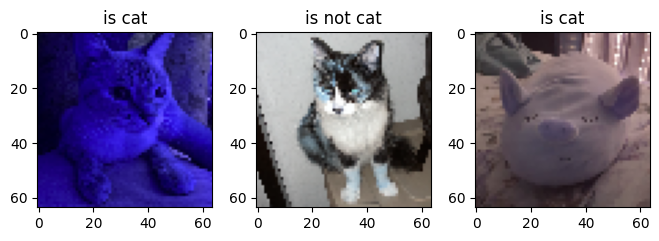

In [20]:
fig = plt.figure(figsize=(8, 5))

ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)

yTest1 = perceptron.predict(tmp1)
yTest2 = perceptron.predict(tmp2)
yTest3 = perceptron.predict(tmp3)

ax1.set_title("is cat" if yTest1 else "is not cat")
ax2.set_title("is cat" if yTest2 else "is not cat")
ax3.set_title("is cat" if yTest3 else "is not cat")

ax1.imshow(test1)
ax2.imshow(test2)
ax3.imshow(test3)
plt.show()

### **Regresión logística con _sklearn_**

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X, y.ravel())

LogisticRegression(C=1000.0, random_state=0)

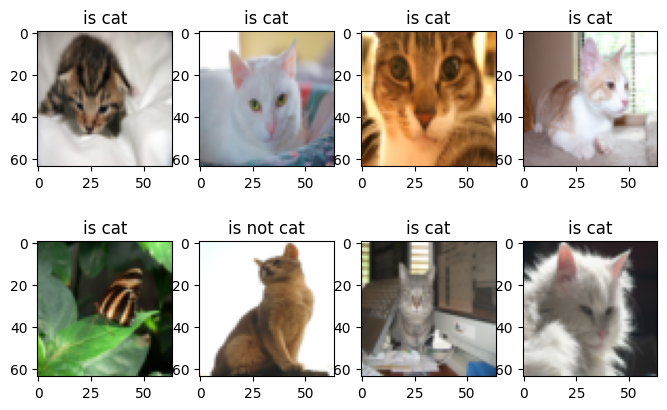

'test accuracy: 51.28 %'

In [23]:
XTest = originalTestX.reshape(originalTestX.shape[0], -1)
yTest = np.expand_dims(originalTesty, axis=1)
yPred = lr.predict(XTest)

fig = plt.figure(figsize=(8, 5))

ax1 = plt.subplot(241)
ax2 = plt.subplot(242)
ax3 = plt.subplot(243)
ax4 = plt.subplot(244)
ax5 = plt.subplot(245)
ax6 = plt.subplot(246)
ax7 = plt.subplot(247)
ax8 = plt.subplot(248)

ax1.set_title("is cat" if yPred[1] else "is not cat")
ax2.set_title("is cat" if yPred[2] else "is not cat")
ax3.set_title("is cat" if yPred[3] else "is not cat")
ax4.set_title("is cat" if yPred[4] else "is not cat")
ax5.set_title("is cat" if yPred[5] else "is not cat")
ax6.set_title("is cat" if yPred[6] else "is not cat")
ax7.set_title("is cat" if yPred[7] else "is not cat")
ax8.set_title("is cat" if yPred[8] else "is not cat")

ax1.imshow(originalTestX[1, :, :, :])
ax2.imshow(originalTestX[2, :, :, :])
ax3.imshow(originalTestX[3, :, :, :])
ax4.imshow(originalTestX[4, :, :, :])
ax5.imshow(originalTestX[5, :, :, :])
ax6.imshow(originalTestX[6, :, :, :])
ax7.imshow(originalTestX[7, :, :, :])
ax8.imshow(originalTestX[8, :, :, :])
plt.show()

f"test accuracy: {100 - np.mean(np.abs(yPred - yTest)) * 100} %"

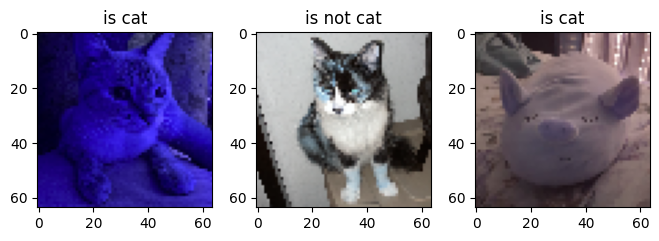

In [24]:
fig = plt.figure(figsize=(8, 5))

ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)

yTest1 = lr.predict(tmp1)
yTest2 = lr.predict(tmp2)
yTest3 = lr.predict(tmp3)

ax1.set_title("is cat" if yTest1 else "is not cat")
ax2.set_title("is cat" if yTest2 else "is not cat")
ax3.set_title("is cat" if yTest3 else "is not cat")

ax1.imshow(test1)
ax2.imshow(test2)
ax3.imshow(test3)
plt.show()